# Exploring the Feasibility of Predicting California Housing Prices in 1990 Using Different Explanatory Variables

## 1. Introduction

The objective of this project is to explore the feasibility of predicting California housing prices in 1990 using different explanatory variables. The project aims to identify the variables that have the most significant impact on housing prices. The California Housing Prices dataset is collected from the 1990 California Census. It provides a wealth of information on housing prices, housing locations, housing structures, and demographic factors in the state, making it an ideal candidate for this type of study. The source of this dataset is the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow', which contains information from the 1990 California census.

This project will analyze the relationship between the demographic and housing structures data with the housing price data, to investigate the explanatory variable that can best predict house prices. This dataset uses information collected from different neighborhood blocks, therefore each row of data displays the features of a specific neighborhood block. The five X variables used in this project are “Median Income”, “Number of Households”, “Population”, “Total Rooms”, and “Median Age”. The Y variable used in this project is “Median House Value”. 

This project will contribute to a deeper understanding of the housing market in California in 1990. The result of this project provides an intuitive explanation for our problem; the best predicting variable is income because it has the strongest correlation to housing prices, which is very understandable as higher income groups can afford more expensive housing.


## 2. Data Loading and Cleaning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_houseprice=pd.read_csv("/Users/frankzhong/Downloads/ECO225/ECO225PROJECT/Data/housing.csv")
print("Number of rows: ", len(df_houseprice))

Number of rows:  20640


#### Step 1: Check for missing values

In [3]:
df_houseprice.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We found there to be 207 missing data in the "total_bedrooms".

#### Step 2: Impute the missing values using the average based on location of the house with respect to ocean


In [4]:
print("The different categories of ocean proximity to be used:", df_houseprice['ocean_proximity'].unique())

The different categories of ocean proximity to be used: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


We will create a new dataframe called "new_house" with only columns of 'total_bedrooms' and 'ocean_proximity' to find the average of 'total_bedrooms' categorized by 'ocean_proximity', and impute the missing data with this average.

In [5]:
new_house = df_houseprice[['total_bedrooms', 'ocean_proximity']]
new_house

,total_bedrooms,ocean_proximity
0,129.0,NEAR BAY
1,1106.0,NEAR BAY
2,190.0,NEAR BAY
3,235.0,NEAR BAY
4,280.0,NEAR BAY
...,...,...
20635,374.0,INLAND
20636,150.0,INLAND
20637,485.0,INLAND
20638,409.0,INLAND


Computing the average total bedrooms within a block based on location of the house with respect to ocean.

In [6]:
result = new_house.groupby('ocean_proximity').mean()
result

,total_bedrooms
ocean_proximity,
<1H OCEAN,546.539185
INLAND,533.881619
ISLAND,420.400000
NEAR BAY,514.182819
NEAR OCEAN,538.615677


Imputing the average to the new_house dataframe

In [13]:
for i in range(len(new_house)):
    if pd.isnull(new_house['total_bedrooms'][i]):
        new_house['total_bedrooms'][i] = result['total_bedrooms'][new_house['ocean_proximity'][i]]

Checking the missing data in the "new_house" dataframe have been imputed.

In [8]:
new_house.isnull().sum()

total_bedrooms     0
ocean_proximity    0
dtype: int64

Merging the imputed column to the original dataframe and it no longer has any missing data.

In [9]:
df_houseprice['total_bedrooms'] = new_house['total_bedrooms']
df_houseprice.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Step 3: Dropping the geographic columns and conduct house value analysis using the rest of the explanetory variables

The geographic variables are dropped because of the complexity nature in their units and scales, therefore it is challenging to include them in the analysis.

In [10]:
df_predict_price = df_houseprice.drop(columns=['longitude', 'latitude', 'ocean_proximity'])
df_predict_price

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129.0,322,126,8.3252,452600
1,21,7099,1106.0,2401,1138,8.3014,358500
2,52,1467,190.0,496,177,7.2574,352100
3,52,1274,235.0,558,219,5.6431,341300
4,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100
20636,18,697,150.0,356,114,2.5568,77100
20637,17,2254,485.0,1007,433,1.7000,92300
20638,18,1860,409.0,741,349,1.8672,84700


#### Step 4: Dropping the "total_bedrooms" column because of its collinearity with the "total_rooms" column

In [11]:
room_correlation = df_predict_price['total_rooms'].corr(df_predict_price['total_bedrooms'])
print("The correlation between total_rooms and total_bedrooms is: ", room_correlation)

The correlation between total_rooms and total_bedrooms is:  0.9272521715028144


<AxesSubplot: title={'center': 'Total Bedrooms and Total Rooms Correlation'}, xlabel='Total Rooms', ylabel='Total Bedrooms'>

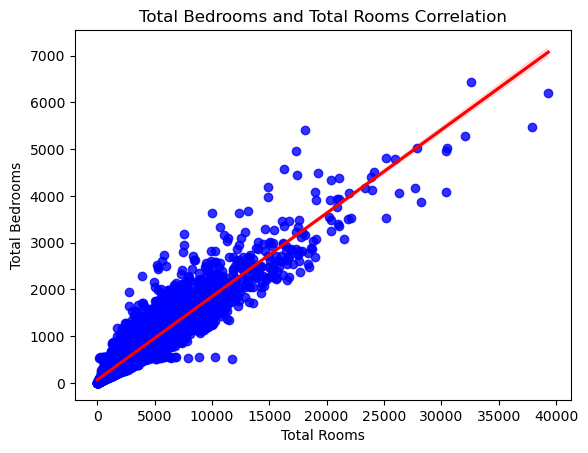

In [15]:
import seaborn as sns
rooms_cor = sns.regplot(x=df_predict_price.total_rooms, y=df_predict_price.total_bedrooms, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
rooms_cor.set_title('Total Bedrooms and Total Rooms Correlation')
rooms_cor.set_xlabel('Total Rooms')
rooms_cor.set_ylabel('Total Bedrooms')
rooms_cor

In [16]:
df_prepared = df_predict_price.drop(columns = ['total_bedrooms'])
df_prepared

,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,41,880,322,126,8.3252,452600
1,21,7099,2401,1138,8.3014,358500
2,52,1467,496,177,7.2574,352100
3,52,1274,558,219,5.6431,341300
4,52,1627,565,259,3.8462,342200
...,...,...,...,...,...,...
20635,25,1665,845,330,1.5603,78100
20636,18,697,356,114,2.5568,77100
20637,17,2254,1007,433,1.7000,92300
20638,18,1860,741,349,1.8672,84700


We have now finalized what explanatory variables we want to keep for this project.

#### Step 5: Removing Outliers

We have created a function to check for outliers within a dataframe, and used that function to remove the standardized dataframe. Once the outliers are dropped, we have created an unstandardized  dataframe by making a copy of the "prepared" dataframe named "df_finalized" and keeping the same indexes that hold the remaining rows that have no outliers values. As a result, the new dataframe has 894 less entries.

In [17]:
#Standardize dataframe
standardized = (df_predict_price - df_predict_price.mean()) / df_predict_price.std()

#Check for outliers
def check_outliers(df, threshold=3):
    mean = df.mean()
    std = df.std()
    z = (df - mean) / std
    outliers = df[(np.abs(z) > threshold).any(axis=1)]
    return outliers

outliers = check_outliers(standardized)

#Drop outliers
df_no_outliers = standardized.drop(outliers.index, axis=0)

#Unstandardize dataframe
keep = df_no_outliers.index
df_finalized = df_prepared.loc[keep]

print("Number of rows before: ", len(standardized))
print("Number of rows after:", len(df_finalized))


Number of rows before:  20640
Number of rows after: 19746


**This concludes our data cleaning process and the "df_finalized" dataframe is ready to be used for our analysis.**

## 3. Summary Statistic

In [18]:
summary = df_finalized.describe()

print('Summary Statistics for the 1990 California Census:')
summary

Summary Statistics for the 1990 California Census:


,housing_median_age,total_rooms,population,households,median_income,median_house_value
count,19746.000000,19746.000000,19746.000000,19746.000000,19746.000000,19746.000000
mean,29.020055,2391.087208,1311.810088,460.504153,3.724951,201820.017168
std,12.416867,1434.521943,772.867946,267.598163,1.601798,110647.669263
min,1.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,19.000000,1430.000000,782.000000,278.000000,2.541700,117800.000000
50%,29.000000,2082.000000,1151.000000,404.000000,3.491250,177000.000000
75%,37.000000,3026.750000,1672.000000,585.000000,4.648400,258300.000000
max,52.000000,9179.000000,4818.000000,1644.000000,9.556100,500001.000000


After cleaning the 1990 California Census data, the summary statistics table shows that we have 19,746 observations remaining for us to analyze. 

We can see that we are conducting a study on 1990 California housing in the price range of \\$15,000 to \\$500,000 with most of the houses being less than the \\$250,000 price point. The houses' age varies from being recently constructed less than a year ago to 52 years ago and the houses have an average age of 29 years. The census also covers a vast variety of income groups from the lower spectrum household income of less than \\$5,000 to wealthy families making more than \\$90,000 in household income. It is important to note that the majority of the observations make around \\$35,000 in household income. 

Some interesting insights found from looking at the table are that there are observations from possibly unconstructed or undeveloped regions that are unpopulated. The minimum value shows that in this census, there are neighborhood blocks with only 2 rooms, 2 households, or only 3 people residing.

The broad range of data in each column shows that we can conduct a detailed correlation analysis between each explanatory variable and the response variable to find which variables are the biggest factor affecting the 1990 house value in California.

## 4. Plots, Histograms, Figures

#### Scatter Plots to display each x variable's relationship with the median house price

In [19]:
price_thousands = pd.DataFrame()
price_thousands['median_house_value'] = df_finalized['median_house_value'] / 1000


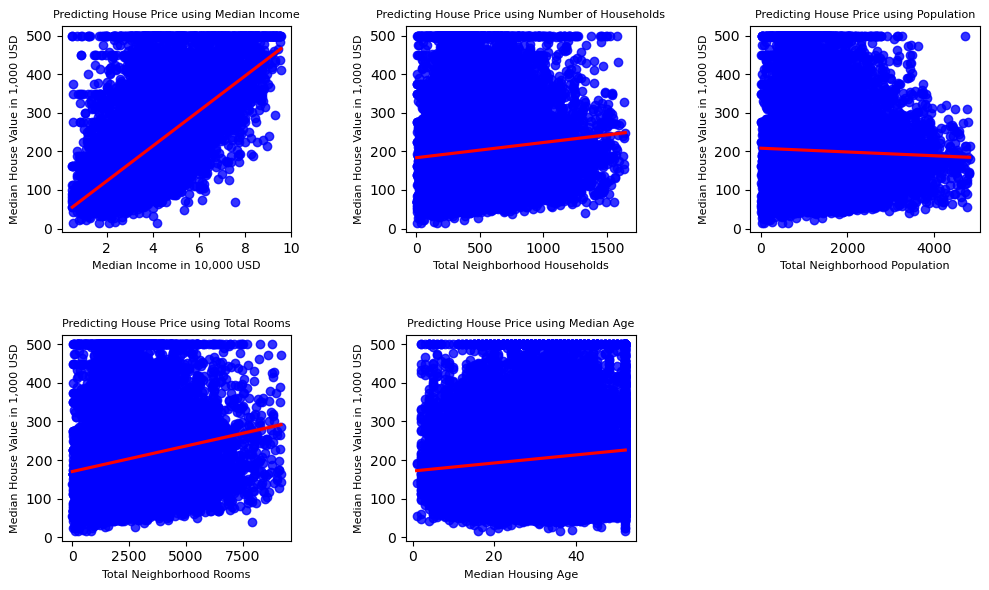

In [20]:
import seaborn as sns

fig, ax = plt.subplots(2, 3, figsize=(10, 6))



sns.regplot(x=df_finalized.median_income, y=price_thousands.median_house_value, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=ax[0][0])


sns.regplot(x=df_finalized.households, y=price_thousands.median_house_value, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=ax[0][1])


sns.regplot(x=df_finalized.population, y=price_thousands.median_house_value, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=ax[0][2])


sns.regplot(x=df_finalized.total_rooms, y=price_thousands.median_house_value, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'},ax=ax[1][0])


sns.regplot(x=df_finalized.housing_median_age, y=price_thousands.median_house_value, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'},ax=ax[1][1])

fig.delaxes(ax[1][2])

ax[0][0].set_title('Predicting House Price using Median Income', fontsize=8)
ax[0][1].set_title('Predicting House Price using Number of Households', fontsize=8)
ax[0][2].set_title('Predicting House Price using Population', fontsize=8)
ax[1][0].set_title('Predicting House Price using Total Rooms', fontsize=8)
ax[1][1].set_title('Predicting House Price using Median Age', fontsize=8)

ax[0][0].set_ylabel('Median House Value in 1,000 USD', fontsize=8)
ax[0][1].set_ylabel('Median House Value in 1,000 USD', fontsize=8)
ax[0][2].set_ylabel('Median House Value in 1,000 USD', fontsize=8)
ax[1][0].set_ylabel('Median House Value in 1,000 USD', fontsize=8)
ax[1][1].set_ylabel('Median House Value in 1,000 USD', fontsize=8)


ax[0][0].set_xlabel('Median Income in 10,000 USD', fontsize=8)
ax[0][1].set_xlabel('Total Neighborhood Households', fontsize=8)
ax[0][2].set_xlabel('Total Neighborhood Population', fontsize=8)
ax[1][0].set_xlabel('Total Neighborhood Rooms', fontsize=8)
ax[1][1].set_xlabel('Median Housing Age', fontsize=8)


fig.tight_layout()
fig.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

It is apparent that the median income has the strongest positive correlation with the median house value which is quite obvious because households with a higher income can afford higher-priced houses. The neighborhood rooms also have a decent positive correlation to the median house value, and it can infer that more expensive houses tend to be larger than the less expensive houses, therefore having a larger number of rooms as well. However, a larger number of rooms in a neighborhood does not necessarily represent a neighborhood with fancy large houses, it could simply be an observation of a densily populated neighborhood with inadequate housing.

The total households and total population will be regarded as ineffective predictors because they show a weak correlation with house value. In addition to their weak correlation, the two explanatory variables also produce a conflicting result. The neighborhood household scatterplot suggests that when there are more households in a block, the higher its median house value in that block will be. A higher number of households will typically infer a higher population. However, the neighborhood population scatterplot suggests that a higher population leads to a lower median house value. The issue between these two variables may be caused by hidden confounding variables or nonresponse errors.

The median housing age scatterplot suggests that older houses tend to be more expensive the newer houses. This variable will also be disregarded as it does not provide a clear correlation with median house value.

#### Reduce scatters by using the binscatter method
#### *Source code provided by Elizabeth Santorella, originally written for STATA by Prof. Michael Stepner at UofT

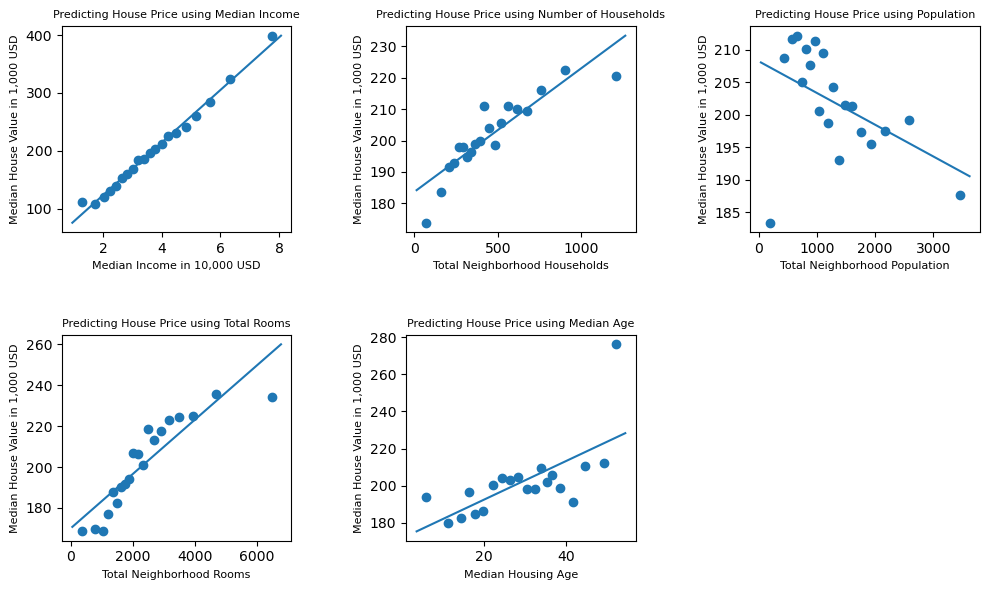

In [21]:
#Elizabeth Santorella bin scatter original
import binscatter
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(10, 6))

#Create plots
ax[0][0].binscatter(df_finalized["median_income"], price_thousands["median_house_value"])
ax[0][1].binscatter(df_finalized["households"], price_thousands["median_house_value"])
ax[0][2].binscatter(df_finalized["population"], price_thousands["median_house_value"])
ax[1][0].binscatter(df_finalized["total_rooms"], price_thousands["median_house_value"])
ax[1][1].binscatter(df_finalized["housing_median_age"], price_thousands["median_house_value"])

#Create plot titles
ax[0][0].set_title('Predicting House Price using Median Income', fontsize=8)
ax[0][1].set_title('Predicting House Price using Number of Households', fontsize=8)
ax[0][2].set_title('Predicting House Price using Population', fontsize=8)
ax[1][0].set_title('Predicting House Price using Total Rooms', fontsize=8)
ax[1][1].set_title('Predicting House Price using Median Age', fontsize=8)


ax[0][0].set_ylabel('Median House Value in 1,000 USD', fontsize=8)
ax[0][1].set_ylabel('Median House Value in 1,000 USD', fontsize=8)
ax[0][2].set_ylabel('Median House Value in 1,000 USD', fontsize=8)
ax[1][0].set_ylabel('Median House Value in 1,000 USD', fontsize=8)
ax[1][1].set_ylabel('Median House Value in 1,000 USD', fontsize=8)


ax[0][0].set_xlabel('Median Income in 10,000 USD', fontsize=8)
ax[0][1].set_xlabel('Total Neighborhood Households', fontsize=8)
ax[0][2].set_xlabel('Total Neighborhood Population', fontsize=8)
ax[1][0].set_xlabel('Total Neighborhood Rooms', fontsize=8)
ax[1][1].set_xlabel('Median Housing Age', fontsize=8)
fig.delaxes(ax[1][2])

plt.tight_layout()
fig.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()


The binscatter method groups x variables into equal sized bins to provide more readable scatterplots that originally hold an enormous set of obersvations. The binscatter scatterplots produce a stronger visualization of the correlation between the explanatory variable with the median house value and further strengthens our findings from above.

#### Finding the OLS slope of the scatterplots for Median Income and Total Rooms

In [22]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df_finalized["median_income"], price_thousands["median_house_value"])


print("Median Income - Median House Value OLS Slope: ",slope)


Median Income - Median House Value OLS Slope:  45.39114336817376


#### Histograms to show the distribution of each variable

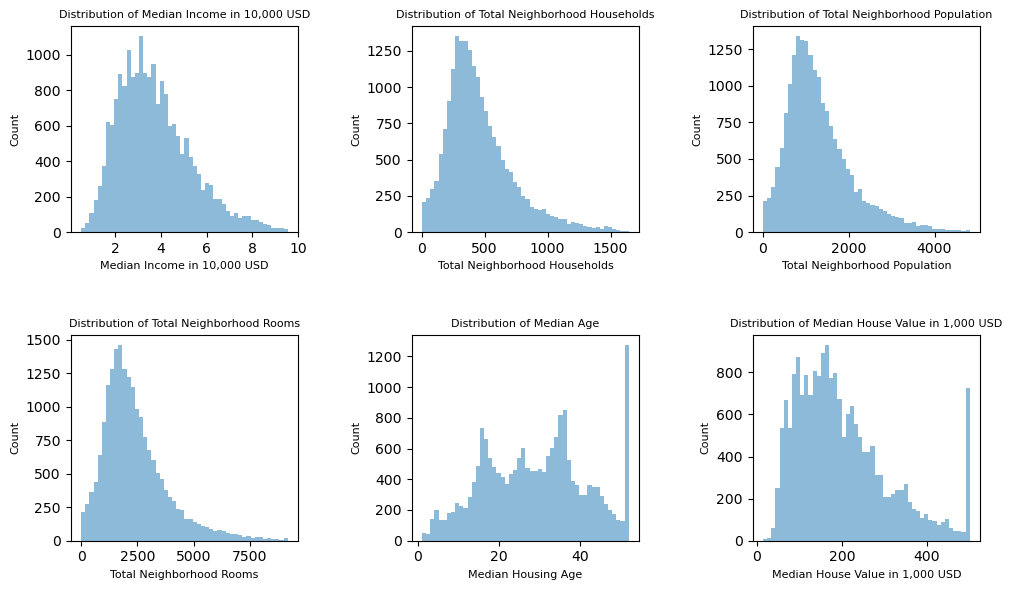

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

ax[0][0].hist(df_finalized['median_income'], bins=50, alpha=0.5)
ax[0][1].hist(df_finalized['households'], bins=50, alpha=0.5)
ax[0][2].hist(df_finalized['population'], bins=50, alpha=0.5)
ax[1][0].hist(df_finalized['total_rooms'], bins=50, alpha=0.5)
ax[1][1].hist(df_finalized['housing_median_age'], bins=50, alpha=0.5)
ax[1][2].hist(price_thousands['median_house_value'], bins=50, alpha=0.5)


ax[0][0].set_title('Distribution of Median Income in 10,000 USD', fontsize=8)
ax[0][1].set_title('Distribution of Total Neighborhood Households', fontsize=8)
ax[0][2].set_title('Distribution of Total Neighborhood Population', fontsize=8)
ax[1][0].set_title('Distribution of Total Neighborhood Rooms', fontsize=8)
ax[1][1].set_title('Distribution of Median Age', fontsize=8)
ax[1][2].set_title('Distribution of Median House Value in 1,000 USD', fontsize=8)

ax[0][0].set_xlabel('Median Income in 10,000 USD', fontsize=8)
ax[0][1].set_xlabel('Total Neighborhood Households', fontsize=8)
ax[0][2].set_xlabel('Total Neighborhood Population', fontsize=8)
ax[1][0].set_xlabel('Total Neighborhood Rooms', fontsize=8)
ax[1][1].set_xlabel('Median Housing Age', fontsize=8)
ax[1][2].set_xlabel('Median House Value in 1,000 USD', fontsize=8)

ax[0][0].set_ylabel('Count', fontsize=8)
ax[0][1].set_ylabel('Count', fontsize=8)
ax[0][2].set_ylabel('Count', fontsize=8)
ax[1][0].set_ylabel('Count', fontsize=8)
ax[1][1].set_ylabel('Count', fontsize=8)
ax[1][2].set_ylabel('Count', fontsize=8)

plt.tight_layout()
fig.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

We can see that the 1990 median housing age in California has a bimodal distribution around 15 years and 35 years, and it also shows that the mode of the median housing age is old houses above the age of 50. It may be interesting to conduct further studies on why there is a large number of data concentrated at that range.

The other 5 variables share a right-skewed distribution with an exception of median house value having a peak around the \\$500,000 price point. This peak at its tail corresponds to the peak in the median housing age histogram, which may suggest that in 1990, the oldest houses in California are also the most expensive houses.



## 5. Conclusion

We have analyzed the individual relationship between each housing variable and the housing price and we explored the feasibility of using them to predict the 1990 California housing price. The project found interesting insights such as the conflicting trend between total households and total population in relation to housing price, the expensiveness of the oldest houses in California, and median income's influence on housing price.

Comparing the correlation and regression between our explanatory variables with our response variable, we have concluded that the median household income in a block and the total number of rooms in a block are the best estimator for California housing prices in 1990. We estimate that households making \\$4,500 more in household income tend to on average live in houses that that are \\$10,000 more expensive. This shows a strong positive relationship between household income and housing prices, which is in line with our assumption of wealthy households being able to afford expensive houses. 

In future studies, including a categorical variable to describe the quality of each neighorhood block may provide better accuracy for this study. Generalizing each observation into different types of neighborhoods may explain some issues such as the number of rooms' influence on housing prices. It will also describe each explanatory variable more precisely.

## Reference

“Binscatter.” Binscatter: a Stata Program to Generate Binned Scatterplots, https://michaelstepner.com/binscatter/. 

Esantorella. “Esantorella/Binscatter.” GitHub, https://github.com/esantorella/binscatter. 